In [9]:
import pandas as pd
import numpy as np

df = pd.read_parquet('~/wind_daily_2010_adj.parquet')
df.head()
df2 = df[df['CODE']=='510510.SH']



In [12]:
from WindPy import w

a=w.wsd('159731.OF,159732.OF', 'open,high,low,close', '20251201', '20251206', usedf=True)

ModuleNotFoundError: No module named 'WindPy'

/var/folders/zy/nptlsrmj6135ymrf1y08xr5r0000gn/T/ipykernel_67458/3285942658.py:25: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/zy/nptlsrmj6135ymrf1y08xr5r0000gn/T/ipykernel_67458/3285942658.py:25: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/zy/nptlsrmj6135ymrf1y08xr5r0000gn/T/ipykernel_67458/3285942658.py:25: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/zy/nptlsrmj6135ymrf1y08xr5r0000gn/T/ipykernel_67458/3285942658.py:25: UserWarning: Glyph 30424 (\N{CJK UNIFIED IDEOGRAPH-76D8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/zy/nptlsrmj6135ymrf1y08xr5r0000gn/T/ipykernel_67458/3285942658.py:25: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/zy/nptl

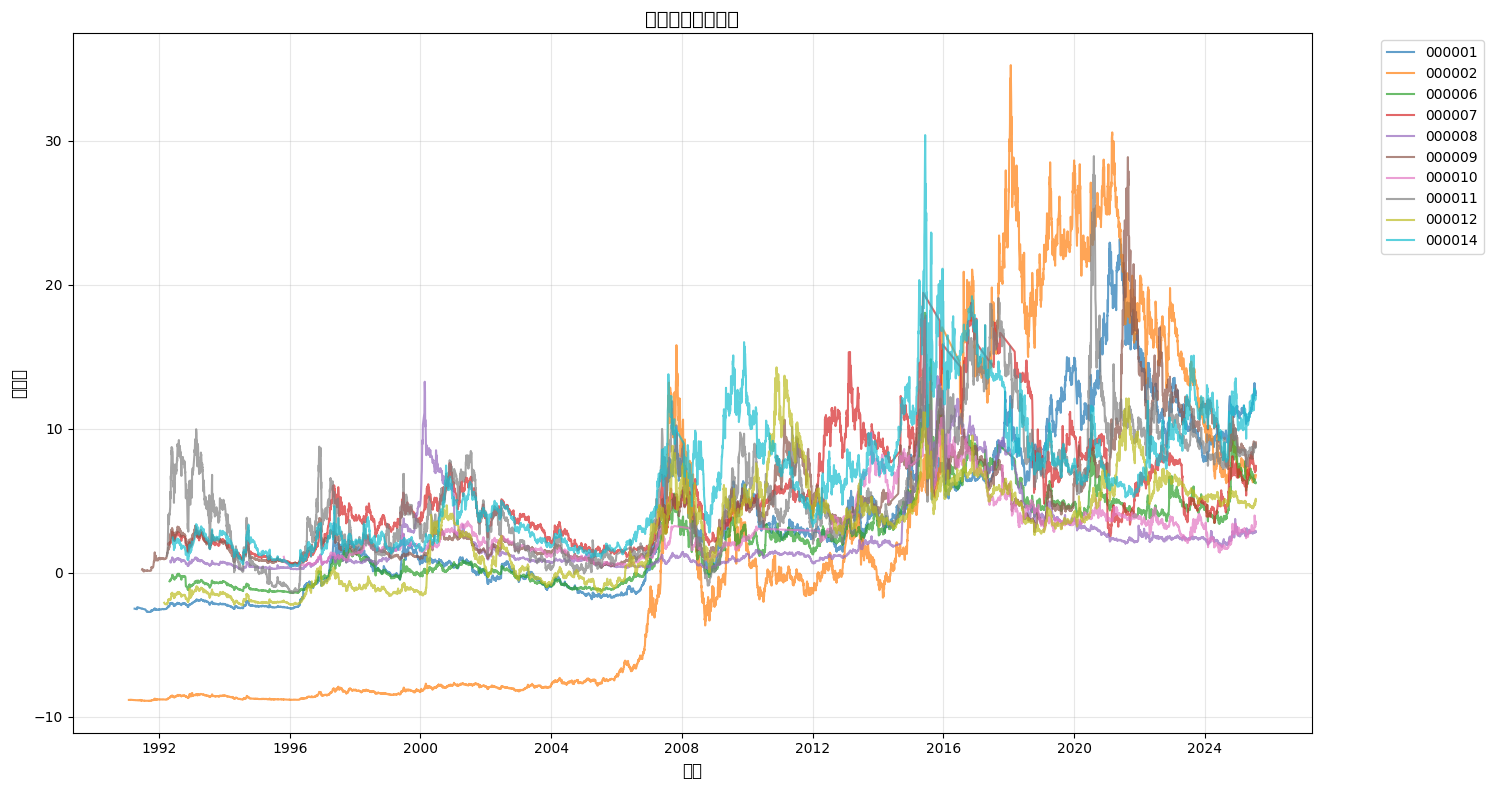

In [8]:
import matplotlib.pyplot as plt

# 获取前10只唯一的股票代码
unique_stocks = df['股票代码'].unique()[:10]
sampledf = df[df['股票代码'].isin(unique_stocks)].copy()

# 确保日期列是datetime类型
if '日期' in sampledf.columns:
    sampledf['日期'] = pd.to_datetime(sampledf['日期'])
    sampledf = sampledf.sort_values(['股票代码', '日期'])

# 绘制每只股票的收盘价走势
plt.figure(figsize=(15, 8))

for stock_code in unique_stocks:
    stock_data = sampledf[sampledf['股票代码'] == stock_code]
    if len(stock_data) > 0:
        plt.plot(stock_data['日期'], stock_data['收盘'], label=str(stock_code), alpha=0.7)

plt.xlabel('日期', fontsize=12)
plt.ylabel('收盘价', fontsize=12)
plt.title('股票收盘价走势图', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()